# 추론 통계에서 $\alpha$= 유의수준 = risk

- 신뢰수준 = 1- $\alpha$
    - 예)신뢰수준 95% 의미: 100 중에 95는 맞고 5는 틀릴 수 있다


- $\alpha$가 0.05일 때 보통 통계적으로 유의미하다고 한다.
    - $\alpha$는 연구자가 정한다.
    - 유의수준이 크면 risk가 크다.
    


# 정규성 검정 (normality test)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import os
import matplotlib

from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline
sns.set(font="AppleGothic")
plt.rcParams['axes.unicode_minus']=False

In [9]:
dir_ = '/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote'
camshaft = pd.read_csv(dir_+'/1 통계이해/camshaft.csv', engine="python")
camshaft.head()
data1 = camshaft['Supp1']
statistic, p = stats.shapiro(data1)
print("Shapiro-wilk test: statistic={}, p-value={}".format(statistic, p))
# 해석: p-value>0.05 => Supp1에 대해서는 정규 분포를 따르고 있다.

Shapiro-wilk test: statistic=0.9788156747817993, p-value=0.10744144767522812


# 신뢰구간 추정
## 모표준편차 아는 경우 ~ Z (데이터 수 30개 이상)

In [12]:
data = [3.6, 2.9, 2.8, 2.6, 3.4, 3.2, 2.2, 2.6, 2.6, 2.4, 2.4, 2.6, 3.4, 2.4, 2.1, 2.6, 3.0, 2.4, 2.7, 2.4, 2.6, 2.9, 2.9, 2.0, 2.7, 2.2, 2.8, 2.7, 1.8, 2.5, 3.0, 3.2, 2.8, 2.6, 3.2, 3.1, 2.9, 2.7, 2.7, 2.2]
df = pd.DataFrame({'sample': data})

# 1.정규성 검증
# 해석: p-value 크다.=>정규분포를 따르고 있다.
statistic, p = stats.shapiro(df)
print("Shapiro-wilk test: statistic={}, p-value={}".format(statistic, p))

# 정규분포 구간 추정 함수 실행
lower, upper = stats.norm.interval(0.95, loc=np.mean(df), scale = 0.397/np.sqrt(40))
print("95% 신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

Shapiro-wilk test: statistic=0.985405445098877, p-value=0.8764991760253906
95% 신뢰구간: ([2.57], [2.82])


## 모표준편차 모르는 경우(대부분) ~ t

In [10]:
data = [54.1, 53.3, 56.1, 55.7, 54, 54.1, 54.4, 57.1, 55.2, 53.8, 54.1, 54.1, 56.1, 55, 55.9, 56, 54.9, 54.3, 53.9, 55]
df = pd.DataFrame({'strength': data})

print('표본평균', df['strength'].mean())
print('표본표준편차', df['strength'].std(ddof=1))

# t 분포 구간 추정 함수 실행 (loc: 평균의 값, scale: 변동 정도)
lower, upper = stats.t.interval(0.95, len(df)-1, loc=np.mean(df), scale = stats.sem(df)) # standard error of mean
print("95% 신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

표본평균 54.855
표본표준편차 1.0101980003939832
95% 신뢰구간: ([54.38], [55.33])


# 평균검정

## 1-sample t-test

In [6]:
data = [74.5,81.2,73.8, 82, 76.3,75.7]
df = pd.DataFrame({'satisfac': data})

# 1-sample t-test
t_result = stats.ttest_1samp(df, 76.7)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print('t 검정 통계량: {}'.format(t))
print('p-value: {}'.format(p))

t 검정 통계량: [0.386]
p-value: [0.715]


## 2-sample t-test


In [23]:
dir_ = '/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote'
df = pd.read_csv(dir_+'/통계data/2sample.csv')#, engine="python")
df.head()

,cust A,cust B
0,6,7
1,5,5
2,5,7
3,4,8
4,6,7


<AxesSubplot:>

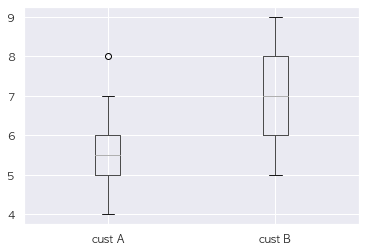

In [8]:
# 통계분석 전에 그래프를 그려 확인
# 목적> 1. 이상치 2. 경향 확인
# 해석> box: 전체 데이터의 25%~75%를 그려준다.
# IQR은 박스의 길이이며, 이것이 클수록 데이터의 산포가 높다고 해석.
# 수염은 Q1, Q4까지 범위를 나타낸 것이며,
# 수염을 벗어난 데이터는 이상치일 가능성이 있다고 해석
# 두 집단에 차이가 있어보이지만 정확한 판단을 위해 검정을 실시.

df.boxplot(['cust A','cust B'])

In [19]:
# 정규성 만족
from scipy.stats import shapiro
stats, p = stats.shapiro(df['cust A'])
print("{}의 Shapiro-wilk test: statistic={}, p-value={}".format('cust A',stats, p))

cust A의 Shapiro-wilk test: statistic=0.9094840288162231, p-value=0.06230909377336502


In [15]:
# 정규성 만족
from scipy.stats import shapiro
stats, p = stats.shapiro(df['cust B'])
print("{}의 Shapiro-wilk test: statistic={}, p-value={}".format('cust B',stats, p))

cust B의 Shapiro-wilk test: statistic=0.9119446873664856, p-value=0.06941930204629898


In [21]:
# 등분산성 만족
from scipy import stats
print(stats.bartlett(df['cust A'], df['cust B']))

BartlettResult(statistic=0.3717065402376611, pvalue=0.5420755238642572)


In [20]:
# 2sample t-test
# 차이가 있다

t_result = stats.ttest_ind(df['cust A'], df['cust B'], equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('t 검정 통계량: {}'.format(t))
print('p-value: {}'.format(p))

t 검정 통계량: -3.596
p-value: 0.001


## paired t-test
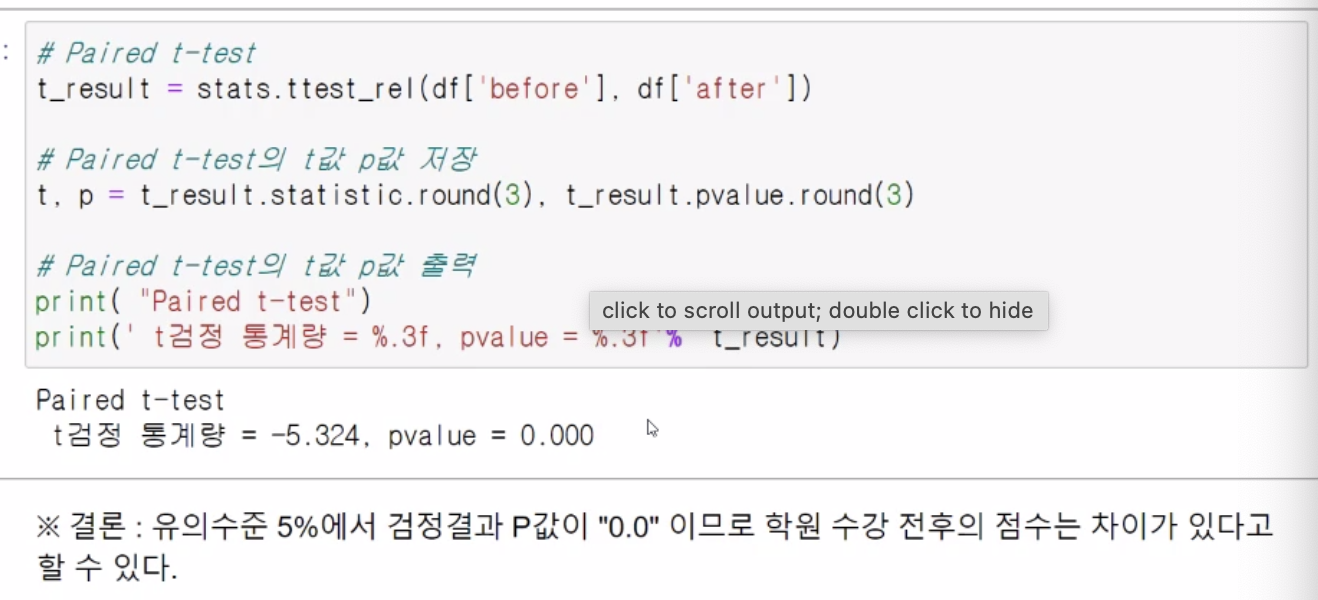

In [24]:
dir_ = '/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote'
df = pd.read_csv(dir_+'/통계data/paired.csv', engine="python")
df.head()

,before,after
0,720,810
1,589,670
2,780,790
3,648,712
4,720,810


In [25]:
df['before'].values

array([720, 589, 780, 648, 720, 589, 780, 648, 780, 648])

In [39]:
# import scipy.stats as stats
from scipy.stats import ttest_rel
df1 = df['before']
df2 = df['after']
t_result = ttest_rel(df1, df2)

## 1 proportion test

In [28]:
from statsmodels.stats.proportion import proportions_ztest

In [33]:
# H0 채택
# 0.1->0.15로 증가했다고 하지만, 변화가 된 것이 아니라 우연히 된 것.
count = 15
n_obs = 100
value =0.1

stat, p = proportions_ztest(count, n_obs, value)
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(p))

z: 1.400
p: 0.161


## 2 proportion test

In [40]:
count = np.array([4,1])

In [41]:
n_obs = np.array([1000, 1200])

In [43]:
# 해석: 두집단의 비율은 차이가 있다 할 수 없다.
stat, p = proportions_ztest(count, n_obs)
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(p))

z: 1.553
p: 0.120


## 카이제곱 검정 

In [60]:
dir_ = '/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote'
df = pd.read_csv(dir_+'/통계data/카이제곱_근무조.csv', engine="python")
df.head()

,work_1,work_2,work_3,work_4
0,270,260,236,234
1,228,285,225,262
2,277,284,231,208


In [66]:
# chi-square test 실행
# 차이가 있다.
from scipy.stats import chi2_contingency

chi, pval, dof, expected = stats.chi2_contingency(df)

print('chi-square test')
print('chisq: {:0.2f}'.format(chi))
print('p: {:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))

chi-square test
chisq: 13.37
p: 0.038
degree pf freedom: 6
expected value: 
[[258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]]


## two-way ANOVA

In [70]:
from statsmodels.stats.anova import anova_lm

dir_ = '/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote'
df = pd.read_csv(dir_+'/통계data/ANOVA1.csv', engine="python")
df.head()

,A_G,B_G,C_G
0,892,721,621
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894


<AxesSubplot:>

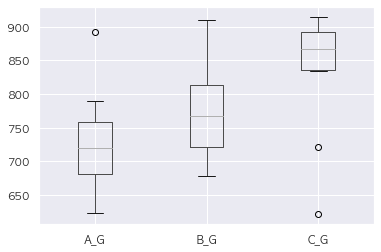

In [71]:
df.boxplot(['A_G','B_G','C_G'])

In [73]:
f_result = stats.f_oneway(df['A_G'],df['B_G'],df['C_G'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('f, p: ',f,p)
print('F 통계량', f)
        
# 그룹간 토익 성적에 차이가 있다.

f, p:  4.263 0.025


# 실습

In [75]:
from statsmodels.stats.anova import anova_lm

dir_ = '/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote'
df = pd.read_csv(dir_+'/1 통계이해/ANOVA.csv', engine="python")
df.info()
# 시간만 연속형
# 나머지 범주형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      24 non-null     float64
 1   charge    24 non-null     object 
 2   gangjong  24 non-null     object 
 3   type      24 non-null     object 
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


<AxesSubplot:title={'center':'time'}, xlabel='gangjong'>

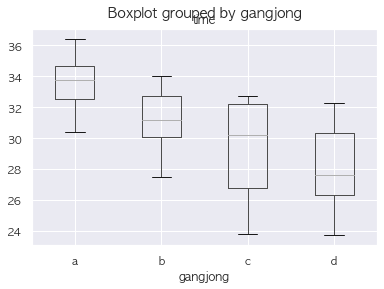

In [76]:
df.boxplot(column='time', by='gangjong') # by: 범주별로 시간 보여준다

In [77]:
from statsmodels.formula.api import ols

In [79]:
lm = ols('time ~ C(gangjong)', data=df).fit() # 중요) ordinary least squares
print(anova_lm(lm))
# ss, 분산
# H1 채텍, 강종별 차이가 있다.

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


In [80]:
## 실습
lm = ols('time ~ C(type)', data=df).fit() # 중요) ordinary least squares
print(anova_lm(lm))

            df      sum_sq    mean_sq         F   PR(>F)
C(type)    1.0   82.881667  82.881667  9.653816  0.00514
Residual  22.0  188.878333   8.585379       NaN      NaN
